# Introduction to geospatial vector data in Python

In [186]:
%matplotlib inline

import pandas as pd
import geopandas
import matplotlib.pyplot as plt

pd.options.display.max_rows = 10

## Importing geospatial data

Geospatial data is often available from specific GIS file formats or data stores, like ESRI shapefiles, GeoJSON files, geopackage files, PostGIS (PostgreSQL) database, ...

We can use the GeoPandas library to read many of those GIS file formats (relying on the `fiona` library under the hood, which is an interface to GDAL/OGR), using the `geopandas.read_file` function.

For example, let's start by reading a shapefile with all the countries of the world (adapted from http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/, zip file is available in the `/data` directory), and inspect the data:

In [187]:
countries = geopandas.read_file(r"C:\Users\new\Desktop\world_data\ne_110m_admin_0_countries.shp")

In [188]:
countries.head()

,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,...,continent,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,geometry
0,1,Admin-0 country,3.0,Afghanistan,AFG,0.0,2.0,Sovereign country,Afghanistan,AFG,...,Asia,Asia,Southern Asia,South Asia,11.0,11.0,4.0,-99.0,1.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,1,Admin-0 country,3.0,Angola,AGO,0.0,2.0,Sovereign country,Angola,AGO,...,Africa,Africa,Middle Africa,Sub-Saharan Africa,6.0,6.0,4.0,-99.0,1.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,1,Admin-0 country,6.0,Albania,ALB,0.0,2.0,Sovereign country,Albania,ALB,...,Europe,Europe,Southern Europe,Europe & Central Asia,7.0,7.0,4.0,-99.0,1.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,1,Admin-0 country,4.0,United Arab Emirates,ARE,0.0,2.0,Sovereign country,United Arab Emirates,ARE,...,Asia,Asia,Western Asia,Middle East & North Africa,20.0,20.0,6.0,-99.0,1.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,1,Admin-0 country,2.0,Argentina,ARG,0.0,2.0,Sovereign country,Argentina,ARG,...,South America,Americas,South America,Latin America & Caribbean,9.0,9.0,4.0,-99.0,1.0,(POLYGON ((-65.50000000000003 -55.199999999999...


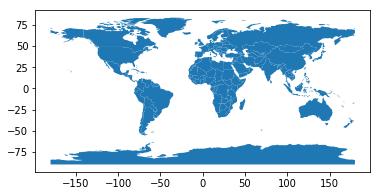

In [189]:
countries.plot()

What can we observe:

- Using `.head()` we can see the first rows of the dataset, just like we can do with Pandas.
- There is a 'geometry' column and the different countries are represented as polygons
- We can use the `.plot()` method to quickly get a *basic* visualization of the data

## What's a GeoDataFrame?

We used the GeoPandas library to read in the geospatial data, and this returned us a `GeoDataFrame`:

In [190]:
type(countries)

geopandas.geodataframe.GeoDataFrame

A GeoDataFrame contains a tabular, geospatial dataset:

* It has a **'geometry' column** that holds the geometry information (or features in GeoJSON).
* The other columns are the **attributes** (or properties in GeoJSON) that describe each of the geometries

Such a `GeoDataFrame` is just like a pandas `DataFrame`, but with some additional functionality for working with geospatial data:

* A `.geometry` attribute that always returns the column with the geometry information (returning a GeoSeries). The column name itself does not necessarily need to be 'geometry', but it will always be accessible as the `.geometry` attribute.
* It has some extra methods for working with spatial data (area, distance, buffer, intersection, ...), which we will see in later notebooks

In [191]:
countries.geometry

0      POLYGON ((61.21081709172574 35.65007233330923,...
1      (POLYGON ((16.32652835456705 -5.87747039146621...
2      POLYGON ((20.59024743010491 41.85540416113361,...
3      POLYGON ((51.57951867046327 24.24549713795111,...
4      (POLYGON ((-65.50000000000003 -55.199999999999...
                             ...                        
172    (POLYGON ((167.8448767438451 -16.4663331030971...
173    POLYGON ((53.10857262554751 16.65105113368895,...
174    POLYGON ((31.52100141777888 -29.25738697684626...
175    POLYGON ((32.75937544122132 -9.23059905358906,...
176    POLYGON ((31.19140913262129 -22.2515096981724,...
Name: geometry, Length: 177, dtype: object

In [192]:
type(countries.geometry)

geopandas.geoseries.GeoSeries

In [193]:
countries.geometry.area

0       63.593500
1      103.599439
2        3.185163
3        7.095047
4      278.923392
          ...    
172      0.631326
173     38.475618
174    112.718524
175     62.789499
176     32.280371
Length: 177, dtype: float64

**It's still a DataFrame**, so we have all the pandas functionality available to use on the geospatial dataset, and to do data manipulations with the attributes and geometry information together.

For example, we can calculate average population number over all countries (by accessing the 'pop_est' column, and calling the `mean` method on it):

In [194]:
countries['pop_est'].mean()

38273987.50282486

Or, we can use boolean filtering to select a subset of the dataframe based on a condition:

In [195]:
africa = countries[countries['continent'] == 'Africa']

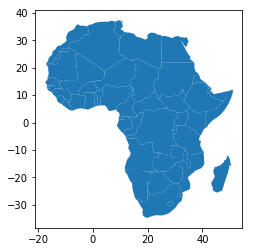

In [196]:
africa.plot()

---

The rest of the tutorial is going to assume you already know some pandas basics, but we will try to give hints for that part for those that are not familiar.   
A few resources in case you want to learn more about pandas:

- Pandas docs: https://pandas.pydata.org/pandas-docs/stable/10min.html
- Other tutorials: chapter from pandas in https://jakevdp.github.io/PythonDataScienceHandbook/, https://github.com/jorisvandenbossche/pandas-tutorial, https://github.com/TomAugspurger/pandas-head-to-tail, ...

<div class="alert alert-info" style="font-size:120%">
<b>REMEMBER</b>: <br>

<ul>
  <li>A `GeoDataFrame` allows to perform typical tabular data analysis together with spatial operations</li>
  <li>A `GeoDataFrame` (or *Feature Collection*) consists of:
   <ul>
    <li>**Geometries** or **features**: the spatial objects</li>
    <li>**Attributes** or **properties**: columns with information about each spatial object</li>
   </ul>
  </li>
</ul>
</div>

## Geometries: Points, Linestrings and Polygons

Spatial **vector** data can consist of different types, and the 3 fundamental types are:

* **Point** data: represents a single point in space.
* **Line** data ("LineString"): represents a sequence of points that form a line.
* **Polygon** data: represents a filled area.

And each of them can also be combined in multi-part geometries (See https://shapely.readthedocs.io/en/stable/manual.html#geometric-objects for extensive overview).

For the example we have seen up to now, the individual geometry objects are Polygons:

In [197]:
print(countries.geometry[2])

POLYGON ((20.59024743010491 41.85540416113361, 20.4631750830992 41.51508901627534, 20.60518191903736 41.08622630468523, 21.0200403174764 40.84272695572588, 20.99998986174722 40.58000397395398, 20.67499677906363 40.43499990494303, 20.61500044117275 40.11000682225938, 20.15001590341052 39.62499766698397, 19.98000044117015 39.69499339452341, 19.96000166187321 39.91500580500605, 19.40608198413673 40.25077342382247, 19.31905887215714 40.72723012955356, 19.40354983895429 41.40956574153546, 19.54002729663711 41.71998607031276, 19.37176883309496 41.87754751237065, 19.30448611825079 42.19574514420782, 19.73805138517963 42.68824738216557, 19.80161339689869 42.50009349219084, 20.07070000000004 42.58863000000008, 20.28375451018189 42.32025950781508, 20.52295000000004 42.21787000000006, 20.59024743010491 41.85540416113361))


Let's import some other datasets with different types of geometry objects.

A dateset about cities in the world (adapted from http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/, zip file is available in the `/data` directory), consisting of Point data:

In [198]:
cities = geopandas.read_file(r"C:\Users\new\Desktop\pop_data\ne_110m_populated_places.shp")

In [199]:
print(cities.geometry[0])

POINT (12.45338654497177 41.90328217996012)


In [200]:
rivers = geopandas.read_file(r"C:\Users\new\Desktop\water_data\ne_50m_rivers_lake_centerlines.shp")

In [201]:
print(rivers.geometry[0])

LINESTRING (51.9371337598152 55.70106609892139, 51.88086646731369 55.68625891701544, 51.82031249962222 55.69745514553858, 51.7476018274624 55.69366250841807, 51.6628417966117 55.60817291874525, 51.57871093775964 55.59943268477065, 51.51342773400279 55.58312409100404, 51.50854492161091 55.52948639548083, 51.48583984403365 55.49640534033426, 51.36914062543957 55.46796295772435, 51.21306254869774 55.50264985760492, 51.13452148447897 55.48273346527725, 51.07934570274205 55.46759674659262, 50.98022460947817 55.46637604371949, 50.83445217522774 55.45630956063775, 50.6883789060617 55.42011139502489, 50.4118652342932 55.40119049644431, 50.07802734358711 55.38112213757665, 49.82216796867687 55.33466217681809, 49.53222656260584 55.260614325191, 49.38232421848795 55.17182037990665, 49.24808475131027 55.11301870345045)


### The `shapely` library

The individual geometry objects are provided by the [`shapely`](https://shapely.readthedocs.io/en/stable/) library

In [202]:
type(countries.geometry[0])

shapely.geometry.polygon.Polygon

To construct one ourselves:

In [203]:
from shapely.geometry import Point, Polygon, LineString

In [204]:
p = Point(1, 1)

In [205]:
print(p)

POINT (1 1)


In [206]:
polygon = Polygon([(0, 1), (1,2), (5, 1)])

<div class="alert alert-info" style="font-size:120%">
<b>REMEMBER</b>: <br><br>

Single geometries are represented by `shapely` objects:

<ul>
  <li>If you access a single geometry of a GeoDataFrame, you get a shapely geometry object</li>
  <li>Those objects have similar functionality as geopandas objects (GeoDataFrame/GeoSeries). For example:
   <ul>
    <li>`single_shapely_object.distance(other_point)` -> distance between two points</li>
    <li>`geodataframe.distance(other_point)` ->  distance for each point in the geodataframe to the other point</li>
   </ul>
  </li>
</ul>
</div>

## Plotting our different layers together

[(-40, 40), (-20, 60)]

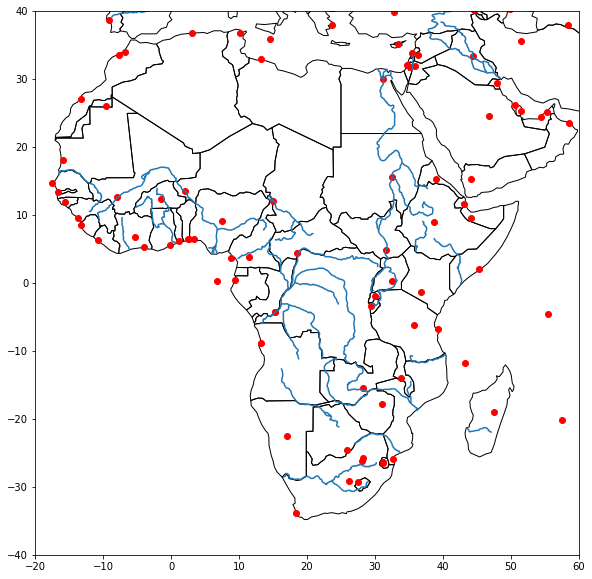

In [207]:
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
rivers.plot(ax=ax)
cities.plot(ax=ax, color='red')
ax.set(xlim=(-20, 60), ylim=(-40, 40))

## Let's practice!

For the exercises, we are going to use some data of the city of Paris:

- The administrative districts of Paris (https://opendata.paris.fr/explore/dataset/quartier_paris/): `paris_districts_utm.geojson`
- Real-time (at the moment I downloaded them ..) information about the public bicycle sharing system in Paris (vélib, https://opendata.paris.fr/explore/dataset/stations-velib-disponibilites-en-temps-reel/information/): `paris_sharing_bike_stations_utm.geojson`

Both datasets are provided as GeoJSON files.

Let's explore those datasets:

<div class="alert alert-success">
 <b>EXERCISE</b>:
 <ul>
  <li>Read both datasets into a GeoDataFrame called `districts` and `stations`.</li>
  <li>Check the type of the returned objects (with `type(..)`)</li>
  <li>Check the first rows of both dataframes. What kind of geometries do those datasets contain?</li>
 </ul> 
 
</div>

In [208]:
districts = geopandas.read_file(r"C:\Users\new\Desktop\paris_districts_utm.geojson")
stations = geopandas.read_file(r"C:\Users\new\Desktop\paris_sharing_bike_stations_utm.geojson")

In [209]:
type(districts)

geopandas.geodataframe.GeoDataFrame

In [210]:
districts.head()

,id,district_name,geometry
0,1,St-Germain-l'Auxerrois,"POLYGON ((451922.1333912524 5411438.484355546,..."
1,2,Halles,"POLYGON ((452278.4194036503 5412160.89282334, ..."
2,3,Palais-Royal,"POLYGON ((451553.8057660239 5412340.522224233,..."
3,4,Place-Vendôme,"POLYGON ((451004.907944323 5412654.094913081, ..."
4,5,Gaillon,"POLYGON ((451328.7522686935 5412991.278156867,..."


In [211]:
stations.head()

,name,bike_stands,available_bikes,geometry
0,14002 - RASPAIL QUINET,44,4,POINT (450804.448740735 5409797.268203795)
1,20503 - COURS DE VINCENNES PYRÉNÉES,21,3,POINT (456414.3523840572 5410698.461014213)
2,20011 - PYRÉNÉES-DAGORNO,21,0,POINT (456366.9088116739 5411563.319737446)
3,31008 - VINCENNES (MONTREUIL),56,0,POINT (458730.7071295079 5411789.995450836)
4,43006 - MINIMES (VINCENNES),28,27,POINT (458234.9299846432 5409991.066579348)


##### <div class="alert alert-success">
 <b>EXERCISE</b>:
 <ul>
  <li>Make a plot of the `districts` dataset</li>
  <li>Set the figure size to (15, 6) (hint: the `plot` method accepts a figsize keyword).</li>
 </ul> 
</div>

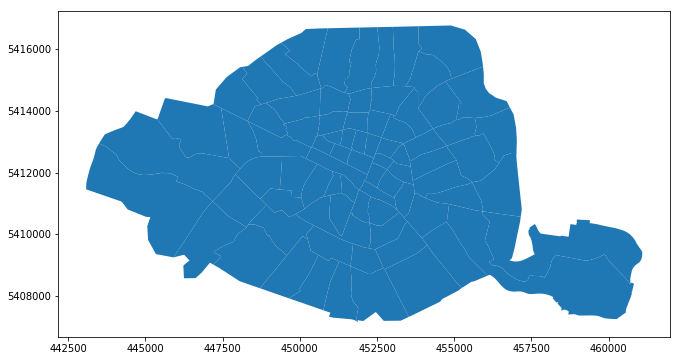

In [212]:
districts.plot(figsize=(15, 6))

<div class="alert alert-success">
 <b>EXERCISE</b>:
 <ul>
  <li>Make a plot of the `stations` dataset (also with a (15, 6) figsize).</li>
  <li>Use the `'available_bikes'` colums to determine the color of the points. For this, use the `column=` keyword.</li>
  <li>Use the `legend=True` keyword to show a color bar.</li>
 </ul> 
</div>

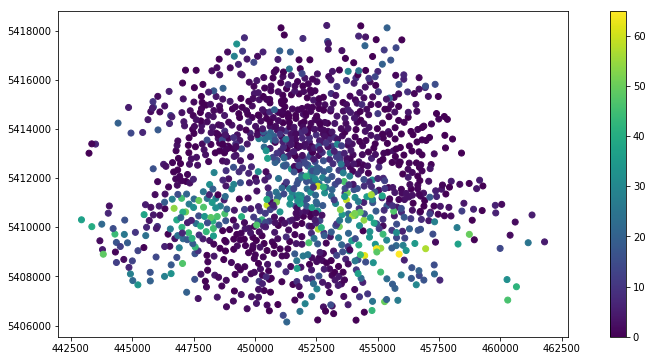

In [213]:
stations.plot(figsize=(15, 6), column='available_bikes', legend=True)

<div class="alert alert-success">
 <b>EXERCISE</b>:
 <ul>
  <li>Visualize the `stations` and `districts` datasets together on a single plot (of 20, 10)).</li>
  <li>Use a grey color for the `districts` dataset with an alpha of 0.5, but use black lines (tip: `edgecolor`).</li>
  <li>You can use `ax.set_axis_off()` to remove the axis (tick)labels.</li>
 </ul>
</div>

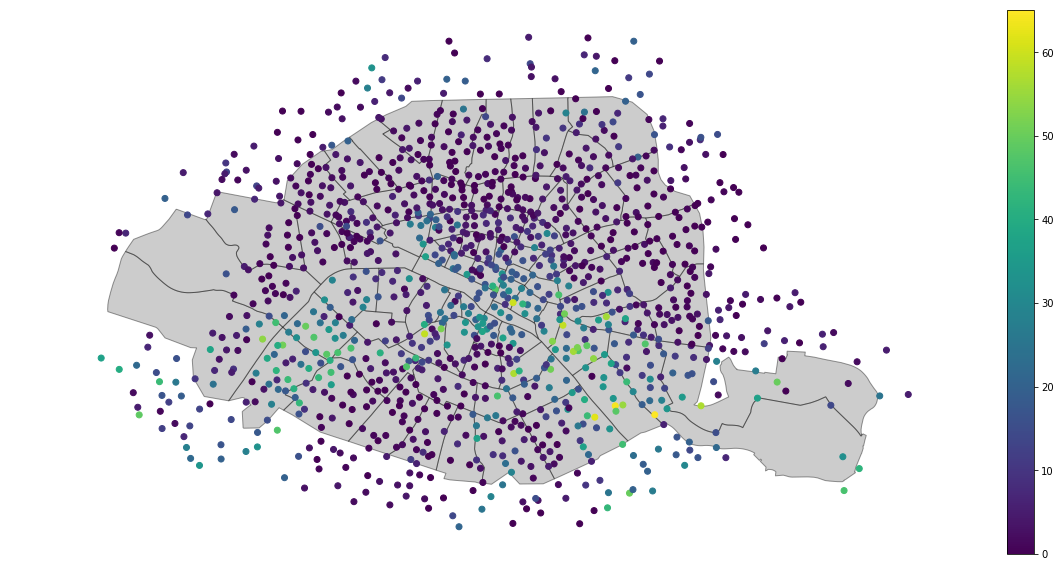

In [214]:
fig, ax = plt.subplots(figsize=(20, 10))
districts.plot(ax=ax, color='grey', alpha=0.4, edgecolor='k')
stations.plot(ax=ax, column='available_bikes', legend=True)
ax.set_axis_off()

<div class="alert alert-success">
 <b>EXERCISE</b>:
  <p>
 <ul>
  <li>What is the largest district? (the biggest area)</li>
 </ul> 
  </p>
 <details><summary>Hint</summary>You can find the location of the largest value with `.idxmax()`</details>
</div>

In [215]:
districts.geometry.area

0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
          ...     
75    1.294254e+06
76    8.061191e+05
77    1.486139e+06
78    1.598127e+06
79    2.089783e+06
Length: 80, dtype: float64

In [216]:
districts.loc[districts.geometry.area.idxmax()]

id                                                              46
district_name                                               Picpus
geometry         POLYGON ((456790.7592171417 5408686.978090666,...
Name: 45, dtype: object

<div class="alert alert-success">
 <b>EXERCISE</b>:

 <ul>
  <li>Make a histogram showing the distribution of the number of bike stands in the stations.</li>
 </ul> 

</div>

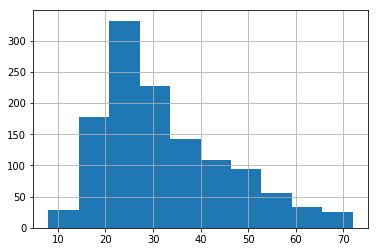

In [217]:
stations['bike_stands'].hist()